### **Librerie**

In [1]:
from cmdstanpy import cmdstan_path, CmdStanModel

import arviz as az
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [2]:
import cmdstanpy
cmdstanpy.install_cmdstan()
a=cmdstan_path()

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
Download successful, file: /tmp/tmpduslzjgx
Extracting distribution


DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.31.0
Building version cmdstan-2.31.0, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Test model compilation
Installed cmdstan-2.31.0


### **Importo** **I** **team**

In [7]:
# Importing 2018-19 season results
Xall=pd.read_csv("season-1819_csv.csv")
cols = Xall.columns
X=Xall[['Date','HomeTeam','AwayTeam','FTR']]
X.head()

,Date,HomeTeam,AwayTeam,FTR
0,18/08/2018,Chievo,Juventus,A
1,18/08/2018,Lazio,Napoli,A
2,19/08/2018,Bologna,Spal,A
3,19/08/2018,Empoli,Cagliari,H
4,19/08/2018,Parma,Udinese,D


In [9]:
# Importing 2017-18 season results
Xall=pd.read_csv("season-1718_csv.csv")
cols = Xall.columns
X_old=Xall[['Date','HomeTeam','AwayTeam','FTR']]
X_old.head()

,Date,HomeTeam,AwayTeam,FTR
0,19/08/17,Juventus,Cagliari,H
1,19/08/17,Verona,Napoli,A
2,20/08/17,Atalanta,Roma,A
3,20/08/17,Bologna,Torino,D
4,20/08/17,Crotone,Milan,A


### **Importo** **gli** **spettatori**

In [12]:
# Importing 2018-19 season spectators
Xall=pd.read_excel("Spettatori1819.xlsx", header=1)
Xspet=Xall.iloc[:,1:21]
Xspet.head()

,Atalanta,Bologna,Cagliari,Chievo,Empoli,Fiorentina,Frosinone,Genoa,Inter,Juventus,Lazio,Milan,Napoli,Parma,Roma,Sampdoria,Sassuolo,SPAL,Torino,Udinese
0,NaN,18441.0,17709.0,18537.0,19229.0,18796.0,18217.0,19673.0,20633.0,19787.0,17401.0,20801.0,19871.0,18152.0,19459.0,19164.0,18432.0,18342.0,18144.0,18663.0
1,19038.0,NaN,20557.0,19107.0,25189.0,21241.0,16076.0,17385.0,26082.0,28934.0,19230.0,22214.0,19351.0,20656.0,20067.0,21391.0,23551.0,21158.0,23245.0,19039.0
2,14821.0,15019.0,NaN,15805.0,13836.0,14735.0,16095.0,15777.0,16223.0,15985.0,16179.0,16201.0,15081.0,16119.0,14938.0,14038.0,14432.0,16121.0,15804.0,15378.0
3,11100.0,9500.0,10100.0,NaN,10200.0,11000.0,9800.0,10500.0,19750.0,28375.0,11500.0,26500.0,13500.0,11200.0,12500.0,10600.0,10000.0,12300.0,10500.0,10700.0
4,8736.0,8379.0,7335.0,7030.0,NaN,8285.0,7828.0,7675.0,10393.0,15889.0,10832.0,13890.0,10911.0,8404.0,10670.0,8815.0,7202.0,10444.0,10344.0,7553.0


### **Importo** **il** **meteo**

In [14]:
# Importing 2018-19 season weather
XMet=pd.read_excel("Meteo18.xlsx")
XMet=XMet.iloc[:,4:6]
for i in range(len(XMet)):
  if(XMet.iloc[i,0]=='S' ):
    XMet.iloc[i,1]=0
  else:
    XMet.iloc[i,1]=1
XMet.head()

,Meteo,FTHG
0,P,1
1,S,0
2,P,1
3,S,0
4,S,0


In [17]:
# Importing 2017-18 season weather
XMet17=pd.read_excel("meteo17.xlsx")
XMet17=XMet17.iloc[:,4:6]
for i in range(len(XMet17)):
  if(XMet17.iloc[i,0]=='S'):
    XMet17.iloc[i,1]=0
  else:
    XMet17.iloc[i,1]=1
XMet17.head()

,Meteo,FTHG
0,S,0
1,P,1
2,S,0
3,P,1
4,P,1


###Controllo le squadre che scendono in B e quelle che salgono in A

Scendono: Benevento, Crotone, Verona


Salgono: Empoli, Frosinone,Parma

In [18]:
Teams_old=list(X_old.iloc[:,1].unique())
Teams_old=sorted(Teams_old)
Teams_old

['Atalanta',
 'Benevento',
 'Bologna',
 'Cagliari',
 'Chievo',
 'Crotone',
 'Fiorentina',
 'Genoa',
 'Inter',
 'Juventus',
 'Lazio',
 'Milan',
 'Napoli',
 'Roma',
 'Sampdoria',
 'Sassuolo',
 'Spal',
 'Torino',
 'Udinese',
 'Verona']

In [19]:
Teams=list(X.iloc[:,1].unique())
Teams=sorted(Teams)
Teams #Salgono in serie A frosinone parma empoli

['Atalanta',
 'Bologna',
 'Cagliari',
 'Chievo',
 'Empoli',
 'Fiorentina',
 'Frosinone',
 'Genoa',
 'Inter',
 'Juventus',
 'Lazio',
 'Milan',
 'Napoli',
 'Parma',
 'Roma',
 'Sampdoria',
 'Sassuolo',
 'Spal',
 'Torino',
 'Udinese']

In [20]:
X_old.loc[X_old.HomeTeam == 'Benevento', 'HomeTeam'] = 'Frosinone'
X_old.loc[X_old.AwayTeam == 'Benevento', 'AwayTeam'] = 'Frosinone'

X_old.loc[X_old.HomeTeam == 'Crotone', 'HomeTeam'] = 'Empoli'
X_old.loc[X_old.AwayTeam == 'Crotone', 'AwayTeam'] = 'Empoli'

X_old.loc[X_old.HomeTeam == "Verona", 'HomeTeam'] = 'Parma'
X_old.loc[X_old.AwayTeam == "Verona", 'AwayTeam'] = 'Parma'

Teams_old=list(X_old.iloc[:,1].unique())
Teams_old=sorted(Teams_old)
pd.options.mode.chained_assignment = None  # default='warn'


In [21]:
Teams_old==Teams

True

In [22]:
Y = np.array([2 if(X.iloc[i,3]=='H') else(0 if(X.iloc[i,3]=='A') else(1)) for i in range(X.shape[0])])

X['Y']=Y.tolist()
X.head()

,Date,HomeTeam,AwayTeam,FTR,Y
0,18/08/2018,Chievo,Juventus,A,0
1,18/08/2018,Lazio,Napoli,A,0
2,19/08/2018,Bologna,Spal,A,0
3,19/08/2018,Empoli,Cagliari,H,2
4,19/08/2018,Parma,Udinese,D,1


(array([106.,   0.,   0.,   0.,   0., 108.,   0.,   0.,   0., 166.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

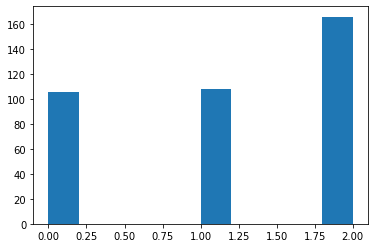

In [23]:
plt.hist(Y)

### Matrix and old skill computation

In [24]:
def names_to_index(Teams):

    """
    Creates a dictionary that associates teams to number
    """
    # dictionary comprehension
    d = {index: value for value, index in enumerate(Teams)}

    return d

In [25]:
def crea_matrici(X):
    """
    Takes as input a matrix X and their result to create two additional matrices that can be used for our model
    """
    #matrice casa trasferta risultato in numeri (N_match, 3)
    Y = np.array([3 if(X.iloc[i,3]=='H') else(0 if(X.iloc[i,3]=='A') else(1)) for i in range(X.shape[0])])
    
    Teams=list(X.iloc[:,1].unique())
    Teams=sorted(Teams)
    d = names_to_index(Teams)
    
    T_1 = np.array([d[X.iloc[i,1]] for i in range(X.shape[0])])
    T_2 = np.array([d[X.iloc[i,2]] for i in range(X.shape[0])])
    R = pd.DataFrame({"Home":T_1,"Away":T_2,"Result":Y})
    
    #matrice di storie delle squadre, casa-trasferta (N_Teams, 2)
    dim_vec_home = R['Home'].value_counts()
    dim_vec_away = R['Away'].value_counts()
    
    R2 = pd.DataFrame(index = sorted(np.unique(T_1)), columns = ["Home", "Away"])
    
    for i in range(len(np.unique(T_1))):
        R2["Home"][i] = np.empty(0,dtype = np.int8)
        R2["Away"][i] = np.empty(0,dtype = np.int8)
        
    for i in range(len(T_1)):
        h = R["Home"][i]
        a = R["Away"][i]
        R2["Home"][h] = np.append(R2["Home"][h],R["Result"][i])
        if(R["Result"][i]==1):                                      #Caso pareggi 1 punto
          R2["Away"][a] = np.append(R2["Away"][a], R["Result"][i])
        else:                                                       #Sconfitta 0 punti
          R2["Away"][a] = np.append(R2["Away"][a], 3 - R["Result"][i])
        
    
    
    return R,R2


In [26]:
def compute_skills(R,R2,init_home,init_away):
    """
    Takes as inputs a matrix X with teams and their result
    init is the inizialization of the skills, must be an array or list with the skill for each team.

    Returns two matrices with home and away skills parameters by team 
    and one matrix with skills parameters oredered cronologically
    """
    import numpy as np
    import pandas as pd

    N=R.shape[0] # number of matches
    
    #Lambda initialization
    l1 = 0.2
    l2 = 0.2

    #Creating matrices to store the skill parameters and their stories
        
    HS = pd.DataFrame(index = R2.index, columns = ["Home", "Away"])
    
    for i in range(R2.shape[0]):
        HS["Home"][i] = np.empty(0)
        HS["Away"][i] = np.empty(0)
        
    data = pd.DataFrame(index = R.index, columns=['Home','Away'])
    C = pd.DataFrame({"Home": np.zeros(len(R2.index), dtype = np.int8), "Away": np.zeros(len(R2.index), dtype = np.int8)})
    
    for i in range(R.shape[0]):
        h = R["Home"][i]
        a = R["Away"][i]
        #calcolo somma per xh
        sh = 0
        for j in range(C["Home"][h]):
            sh = sh + R2["Home"][h][j]*(1-l1)**j
        
        xh = l1*sh + init_home[h]*(1-l1)**C["Home"][h]
        
        #calcolo somma per xv
        sa = 0
        for j in range(C["Away"][a]):
            sa = sa + R2["Away"][a][j]*(1-l2)**j
        
        xv = l2*sa + init_away[a]*(1-l2)**C["Away"][a]
        
        #append nostra matrice storico e dati per stan
        HS["Home"][h] = np.append(HS["Home"][h],round(xh,3))
        HS["Away"][a] = np.append(HS["Away"][a],round(xv,3))
        data["Home"][i] = round(xh,3)
        data["Away"][i] = round(xv,3)
        
        #incremento counts
        C["Home"][h] += 1
        C["Away"][a] += 1

    
    return HS,data

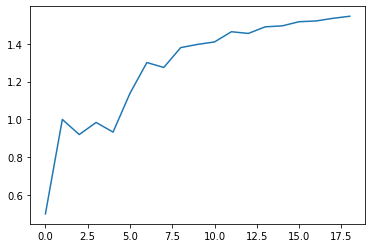

In [27]:
R_old, R2_old = crea_matrici(X)
HS_old, data_old = compute_skills(R_old, R2_old, 0.5*np.ones(len(Teams)), 0.5*np.ones(len(Teams)))

plt.plot(HS_old["Home"][0])

In [28]:
data_old

,Home,Away
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
...,...,...
375,1.881,0.351
376,1.791,1.222
377,1.728,2.809
378,1.417,1.144


In [29]:
data_old

,Home,Away
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
...,...,...
375,1.881,0.351
376,1.791,1.222
377,1.728,2.809
378,1.417,1.144


In [30]:
init_home = np.empty(0)
init_away = np.empty(0)

for i in range(HS_old.shape[0]):
  init_home = np.append(init_home,HS_old["Home"][i][-1])
  init_away = np.append(init_away,HS_old["Away"][i][-1])

R,R2 = crea_matrici(X)

###Creo vettore Spett per stan

In [31]:
d=names_to_index(Teams)
T_1 = np.array([d[X.iloc[i,1]] for i in range(X.shape[0])])
T_2 = np.array([d[X.iloc[i,2]] for i in range(X.shape[0])])
N=X.shape[0]
Spett = np.array([Xspet.iloc[T_1[i],T_2[i]] for i in range(X.shape[0])])
Spett=(Spett - Spett.min()) / (Spett.max() - Spett.min())

In [32]:
Spett

array([2.99894774e-01, 4.45654156e-01, 1.98639074e-01, 4.70010523e-03,
       8.61592424e-02, 1.77060680e-01, 1.76190810e-01, 1.57376359e-01,
       4.65422659e-01, 3.85464749e-01, 1.04272185e-01, 2.91687127e-01,
       5.71869519e-02, 1.75278850e-01, 7.31462645e-01, 0.00000000e+00,
       1.23044546e-01, 4.87197475e-01, 7.12578043e-01, 2.67723606e-01,
       1.93812697e-01, 1.50249035e-01, 4.48965275e-02, 3.36850228e-01,
       3.85338478e-01, 1.79992985e-01, 3.84426517e-02, 1.51315328e-01,
       7.71939670e-02, 7.38660119e-01, 1.84230095e-01, 1.29091547e-01,
       5.37635917e-02, 1.82841108e-01, 4.70894423e-01, 4.60876885e-01,
       1.65738337e-01, 1.00357769e-01, 1.59017888e-01, 4.46580147e-02,
       3.23647843e-01, 1.10164854e-01, 2.22167660e-01, 1.83332164e-01,
       5.19116100e-02, 1.30620835e-01, 3.42083479e-01, 6.26923886e-01,
       2.19642231e-01, 6.85233251e-01, 1.56352157e-01, 9.87443002e-02,
       1.67927043e-01, 4.51687127e-01, 3.13630305e-01, 3.84145914e-01,
      

## **Modello** **Spettatori**


In [35]:
ordinal_reg = '''
data{
    int<lower=0> N; // Matches
    array[N] int y;
    int<lower=0> T; // Teams
    array[N,3] int R;  // Game+Result matrix
    array[T,2,19] int R2; // Teams' history
    vector[T] IH;    // init_home
    vector[T] IA;    // init_away
    vector[N] SP;    // Spettatori
}

parameters { vector[3] beta; // coefficients for predictor variables 
            real intercept1;
            real<lower=intercept1+0.0001,upper=100000> intercept2;
            real<lower=0,upper=1> l1;
            real<lower=0,upper=1> l2;
}

transformed parameters {
  matrix[N,3] X;     // Skills
  real sh;
  real sa;
  vector[N] mu;
  vector[2] intercept;
  intercept[1] = intercept1;
  intercept[2] = intercept2;
  {
  array[T,2] int C=rep_array(0,T,2);

  for(i in 1:N){
    X[i,3]=SP[i];     // Column spectators
    int h = R[i,1]+1; // Home team index
    int a = R[i,2]+1; // Away team index
    int ch = C[h,1]; // Home count
    int ca = C[a,2]; //Away count

    // Home team skill update
    if(ch==0){
      X[i,1] = IH[h];
    }
    else{
      sh=0;
      for(j in 1:ch){   
        sh=sh+R2[h,1,j]*pow((1-l1),j);
        }
      X[i,1]=l1*sh+IH[h]*pow((1-l1),ch);
    }

    // Away team skill update
    if(ca==0){
      X[i,2] = IA[a];
    }
    else{
      sa=0;
      for(j in 1:ca){   
        sa=sa+R2[a,2,j]*pow((1-l2),j);
      }
      X[i,2]=l2*sa+IA[a]*pow((1-l2),ca);
    }

    // Count update
    C[h,1]=C[h,1]+1;
    C[a,2]=C[a,2]+1;

    mu[i] = row(X, i) * beta;
  }

  }
}

model { // calculate likelihood of ordinal categories given predictor variable values and coefficients 
       
       beta[1] ~ normal(1.1,2);
       beta[2] ~ normal(-1.4,2);
       beta[3] ~ normal(10,2);
  
       intercept1 ~ normal(-0.75,2);
       intercept2 ~ normal(0.75,2);

       l1 ~ beta(2,2);
       l2 ~ beta(2,2);

       for (i in 1:N) { 
         y[i] ~ ordered_logistic(mu[i],intercept); } 
       }

generated quantities{
  vector[N] y_pred; 
  for(i in 1:N){
    y_pred[i] = ordered_logistic_rng(mu[i],intercept);
  }
}
'''

stan_file = "./ordinal_reg.stan"

with open(stan_file, "w") as f:
    print(ordinal_reg, file=f)

ordinal_reg = CmdStanModel(stan_file=stan_file)

07:12:18 - cmdstanpy - INFO - compiling stan file /content/ordinal_reg.stan to exe file /content/ordinal_reg
INFO:cmdstanpy:compiling stan file /content/ordinal_reg.stan to exe file /content/ordinal_reg
DEBUG:cmdstanpy:cmd: make /content/ordinal_reg
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/ordinal_reg.hpp /content/ordinal_reg.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/ordinal_reg.o /content/ordinal_reg.hpp
g++ -s

In [36]:
model_data = {'N': len(Y), 'y': Y+1, 'T': len(Teams), 'R': R, 'R2': R2.values.tolist(), 'IH': init_home, 'IA': init_away, 'SP': Spett}

model_fit=ordinal_reg.sample(data=model_data, chains=4,
                           parallel_chains=4, iter_warmup=1000,
                           iter_sampling=5000)
model_data=az.from_cmdstanpy(model_fit)


DEBUG:cmdstanpy:input tempfile: /tmp/tmptzzr1ejc/z2kj6dn9.json
DEBUG:cmdstanpy:cmd: /content/ordinal_reg info
cwd: None
07:12:42 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=1', 'random', 'seed=97364', 'data', 'file=/tmp/tmptzzr1ejc/z2kj6dn9.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_reg6z1sow4e/ordinal_reg-20230213071242_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=2', 'random', 'seed=97364', 'data', 'file=/tmp/tmptzzr1ejc/z2kj6dn9.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_reg6z1sow4e/ordinal_reg-20230213071242_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=3', 'random', 'seed=97364', 'data', 'file=/tmp/tmptzzr1ejc/z2kj6dn9.json', 'output', 'file=/tmp/t

07:22:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/ordinal_reg', 'id=1', 'random', 'seed=97364', 'data', 'file=/tmp/tmptzzr1ejc/z2kj6dn9.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_reg6z1sow4e/ordinal_reg-20230213071242_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmptzzr1ejc/ordinal_reg6z1sow4e/ordinal_reg-20230213071242_1.csv
 console_msgs (if any):
	/tmp/tmptzzr1ejc/ordinal_reg6z1sow4e/ordinal_reg-20230213071242_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      

In [37]:
R2.values.tolist()

[[array([3, 0, 1, 0, 3, 3, 0, 3, 1, 1, 3, 0, 3, 1, 3, 1, 3, 3, 3]),
  array([1, 0, 1, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 1, 3, 3, 1])],
 [array([0, 0, 3, 3, 1, 0, 1, 1, 0, 0, 1, 0, 3, 3, 3, 3, 3, 3, 3]),
  array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 3, 0, 0, 3, 0, 1, 0, 1])],
 [array([1, 1, 1, 3, 3, 1, 1, 0, 3, 1, 0, 3, 3, 3, 0, 3, 3, 0, 0]),
  array([0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1])],
 [array([0, 1, 0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 0, 0, 0, 1, 0, 1]),
  array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1])],
 [array([3, 0, 1, 0, 0, 3, 3, 3, 0, 0, 0, 1, 3, 1, 3, 3, 0, 3, 3]),
  array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0])],
 [array([3, 3, 3, 3, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1]),
  array([0, 1, 0, 0, 1, 1, 1, 1, 3, 1, 3, 1, 3, 0, 0, 1, 0, 0, 0])],
 [array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]),
  array([0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 3, 3, 0, 1, 0, 3, 0, 1, 0])],
 [array([3, 3, 3, 0, 1, 0, 1, 1, 3, 1, 0,

In [38]:
cmdstanpy_data = az.from_cmdstanpy(model_fit)
np.sum(cmdstanpy_data.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

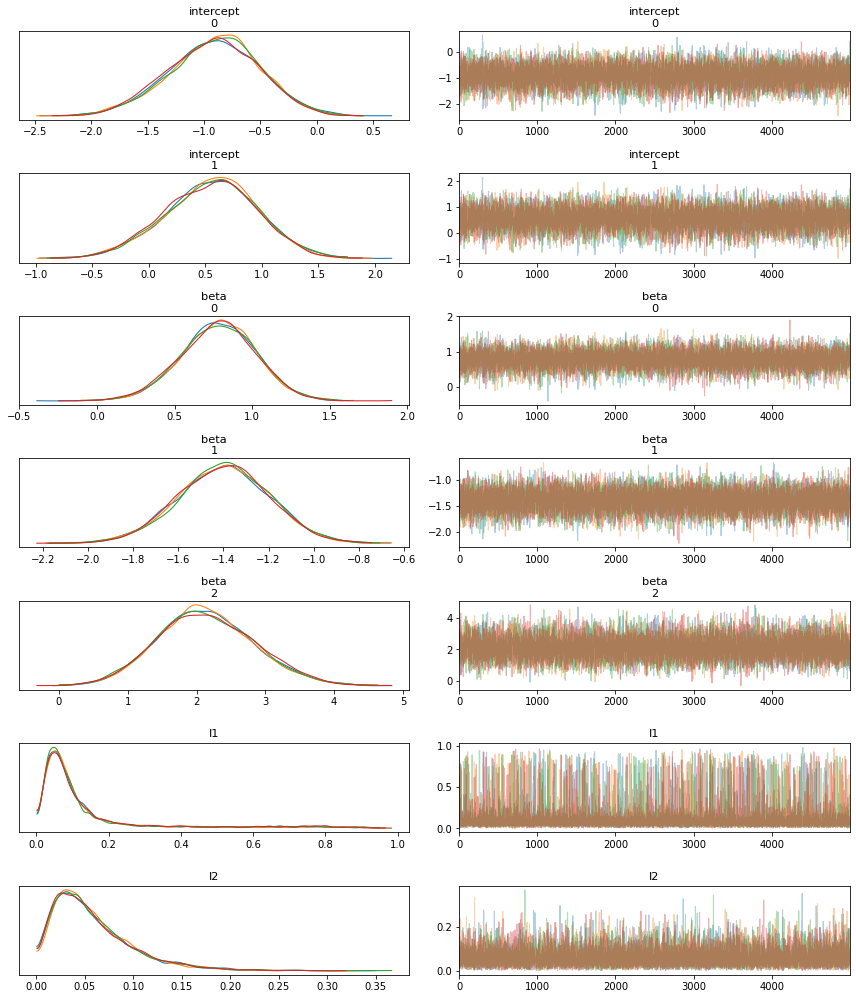

In [39]:
az.plot_trace(model_data, var_names=["intercept","beta","l1","l2"], compact=False)
plt.tight_layout()
#plt.savefig('ParamMod')
plt.show()


In [40]:
pred = model_fit.y_pred
m=0
for i in range(pred.shape[0]):
  if m < sum(pred[i] == Y+1):
    m = sum(pred[i] == Y+1)
    idx = i

In [41]:
print(m,idx)

199 9267


In [42]:
y_pred = []
for i in range(pred.shape[1]):
  unique, counts = np.unique(pred[:,i], return_counts=True)
  perc = counts/pred.shape[0]*100
  y_pred.append(np.argmax(perc))

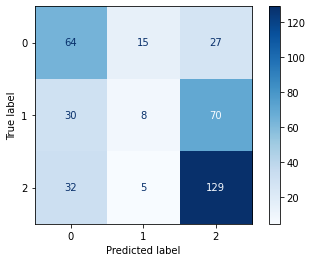

Classification Report
              precision    recall  f1-score   support

           V       0.51      0.60      0.55       106
           P       0.29      0.07      0.12       108
           S       0.57      0.78      0.66       166

    accuracy                           0.53       380
   macro avg       0.45      0.48      0.44       380
weighted avg       0.47      0.53      0.47       380



In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm= confusion_matrix(Y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print('Classification Report')
target_names = ["V","P", "S"]
print(classification_report(Y, y_pred, target_names=target_names))

In [44]:
model_data = {'N': len(Y), 'y': (Y+1).tolist(), 'T': len(Teams), 'R': R, 'R2': R2.values.tolist(), 'IH': init_home, 'IA': init_away, 'SP': Spett}
predictions = ordinal_reg.generate_quantities(model_data, model_fit)

DEBUG:cmdstanpy:input tempfile: /tmp/tmptzzr1ejc/st_jb505.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=1', 'random', 'seed=17264', 'data', 'file=/tmp/tmptzzr1ejc/st_jb505.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_regkhv0jf53/ordinal_reg-20230213072330_1.csv', 'method=generate_quantities', 'fitted_params=/tmp/tmptzzr1ejc/ordinal_reg6z1sow4e/ordinal_reg-20230213071242_1.csv']
07:23:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=2', 'random', 'seed=17264', 'data', 'file=/tmp/tmptzzr1ejc/st_jb505.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_regkhv0jf53/ordinal_reg-20230213072330_2.csv', 'method=generate_quantities', 'fitted_pa

In [45]:
pred = predictions.y_pred
m=0
for i in range(pred.shape[0]):
  if m < sum(pred[i] == Y+1):
    m = sum(pred[i] == Y+1)
    idx = i

# **Modelli** **Meteo**


###  **Primo** **modello**

In [46]:
ordinal_reg = '''
data{
    int<lower=0> N; // Matches
    array[N] int y;
    int<lower=0> T; // Teams
    array[N,3] int R;  // Game+Result matrix
    array[T,2,19] int R2; // Teams' history
    vector[T] IH;    // init_home
    vector[T] IA;    // init_away
    vector[N] MT;    // Meteo
}

parameters { vector[3] beta; // coefficients for predictor variables, considering the dummy
            real intercept1;
            real<lower=intercept1+0.0001,upper=100000> intercept2;
            real<lower=0,upper=1> l1;
            real<lower=0,upper=1> l2;
}

transformed parameters {
  matrix[N,3] X;     // Skills
  real sh;
  real sa;
  vector[N] mu;
  vector[2] intercept;
  intercept[1] = intercept1;
  intercept[2] = intercept2;
  {
  array[T,2] int C=rep_array(0,T,2);

  for(i in 1:N){
    X[i,3]=MT[i];     // Column Meteo
    int h = R[i,1]+1; // Home team index
    int a = R[i,2]+1; // Away team index
    int ch = C[h,1]; // Home count
    int ca = C[a,2]; //Away count

    // Home team skill update
    if(ch==0){
      X[i,1] = IH[h];
    }
    else{
      sh=0;
      for(j in 1:ch){   
        sh=sh+R2[h,1,j]*pow((1-l1),j);
        }
      X[i,1]=l1*sh+IH[h]*pow((1-l1),ch);
    }

    // Away team skill update
    if(ca==0){
      X[i,2] = IA[a];
    }
    else{
      sa=0;
      for(j in 1:ca){   
        sa=sa+R2[a,2,j]*pow((1-l2),j);
      }
      X[i,2]=l2*sa+IA[a]*pow((1-l2),ca);
    }

    // Count update
    C[h,1]=C[h,1]+1;
    C[a,2]=C[a,2]+1;
    mu[i] = row(X, i) * beta;
  }

  }
}

model { // calculate likelihood of ordinal categories given predictor variable values and coefficients 
       
       beta[1] ~ normal(1.1,2);
       beta[2] ~ normal(-1.4,2);
       beta[3] ~ normal(0,2);

       intercept1 ~ normal(-0.75,2);
       intercept2 ~ normal(0.75,2);

       l1 ~ beta(2,2);
       l2 ~ beta(2,2);

       for (i in 1:N) { 
         y[i] ~ ordered_logistic(mu[i],intercept); } 
       }

generated quantities{
  vector[N] y_pred; 
  for(i in 1:N){
    y_pred[i] = ordered_logistic_rng(mu[i],intercept);
  }
}
'''

stan_file = "./ordinal_reg.stan"

with open(stan_file, "w") as f:
    print(ordinal_reg, file=f)

ordinal_reg = CmdStanModel(stan_file=stan_file)

DEBUG:cmdstanpy:Removing /content/ordinal_reg
07:24:43 - cmdstanpy - INFO - compiling stan file /content/ordinal_reg.stan to exe file /content/ordinal_reg
INFO:cmdstanpy:compiling stan file /content/ordinal_reg.stan to exe file /content/ordinal_reg
DEBUG:cmdstanpy:cmd: make /content/ordinal_reg
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/ordinal_reg.hpp /content/ordinal_reg.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content

In [47]:
model_data = {'N': len(Y), 'y': Y+1, 'T': len(Teams), 'R': R, 'R2': R2_old.values.tolist(), 'IH': init_home, 'IA': init_away, 'MT': XMet.iloc[:,1]}

model_fit=ordinal_reg.sample(data=model_data, chains=4,
                           parallel_chains=4, iter_warmup=1000,
                           iter_sampling=5000)
model_data=az.from_cmdstanpy(model_fit)


DEBUG:cmdstanpy:input tempfile: /tmp/tmptzzr1ejc/dn5bltbr.json
DEBUG:cmdstanpy:cmd: /content/ordinal_reg info
cwd: None
07:25:06 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=1', 'random', 'seed=3665', 'data', 'file=/tmp/tmptzzr1ejc/dn5bltbr.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_reg6cm682vw/ordinal_reg-20230213072506_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=2', 'random', 'seed=3665', 'data', 'file=/tmp/tmptzzr1ejc/dn5bltbr.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_reg6cm682vw/ordinal_reg-20230213072506_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=3', 'random', 'seed=3665', 'data', 'file=/tmp/tmptzzr1ejc/dn5bltbr.json', 'output', 'file=/tmp/tmpt

07:33:41 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/ordinal_reg', 'id=1', 'random', 'seed=3665', 'data', 'file=/tmp/tmptzzr1ejc/dn5bltbr.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_reg6cm682vw/ordinal_reg-20230213072506_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmptzzr1ejc/ordinal_reg6cm682vw/ordinal_reg-20230213072506_1.csv
 console_msgs (if any):
	/tmp/tmptzzr1ejc/ordinal_reg6cm682vw/ordinal_reg-20230213072506_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      d

In [48]:
cmdstanpy_data = az.from_cmdstanpy(model_fit)
np.sum(cmdstanpy_data.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

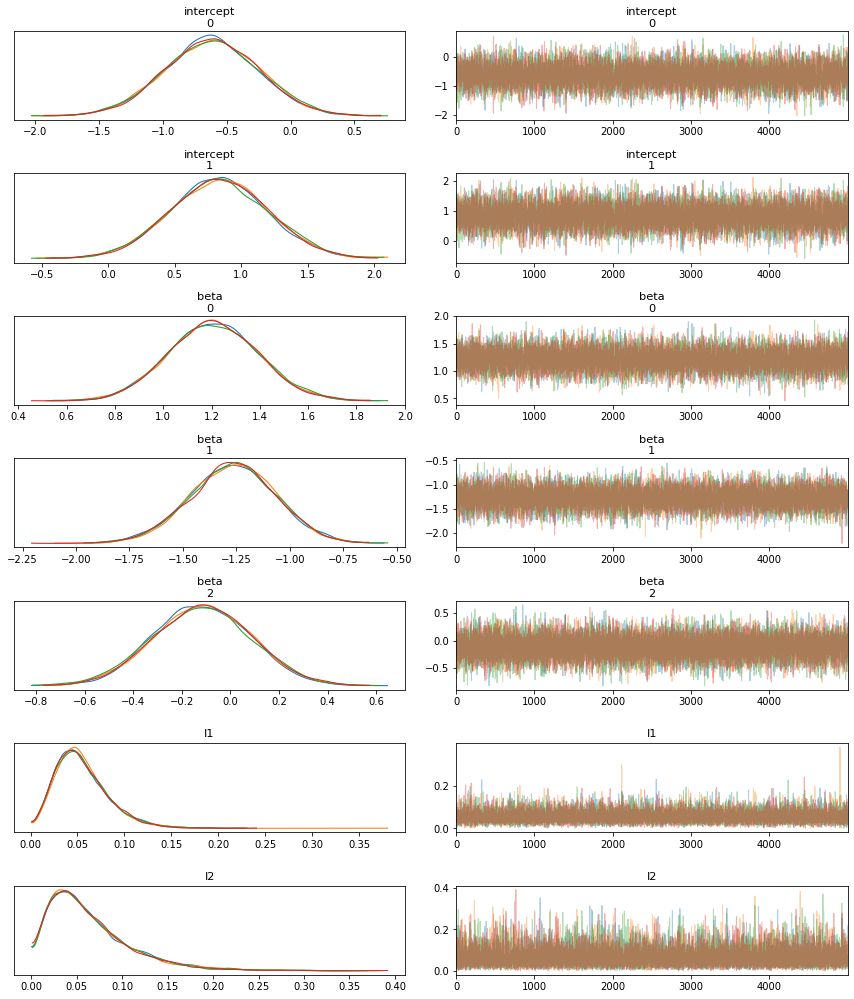

In [49]:
az.plot_trace(model_data, var_names=["intercept","beta","l1","l2"], compact=False)
plt.tight_layout()
#plt.savefig('ParamMod')
plt.show()


In [50]:
pred = model_fit.y_pred
m=0
for i in range(pred.shape[0]):
  if m < sum(pred[i] == Y+1):
    m = sum(pred[i] == Y+1)
    idx = i

In [51]:
print(m,idx)

201 8739


COMMENTO: B2 è PRATICAMENTE NULLA 

## **Secondo** **modello**

In [52]:

ordinal_reg = '''
data{
    int<lower=0> N; // Matches
    array[N] int y;
    int<lower=0> T; // Teams
    array[N,3] int R;  // Game+Result matrix
    array[T,2,19] int R2; // Teams' history
    vector[T] IH;    // init_home
    vector[T] IA;    // init_away
    vector[N] MT;    // Meteo
}

parameters { vector[4] beta; // coefficients for predictor variables, considering the dummy
            real intercept1;
            real<lower=intercept1+0.0001,upper=100000> intercept2;
            real<lower=0,upper=1> l1;
            real<lower=0,upper=1> l2;
}

transformed parameters {
  matrix[N,2] X;     // Skills
  real sh;
  real sa;
  vector[N] mu;
  vector[2] intercept;
  intercept[1] = intercept1;
  intercept[2] = intercept2;
  {
  array[T,2] int C=rep_array(0,T,2);

  for(i in 1:N){
    int h = R[i,1]+1; // Home team index
    int a = R[i,2]+1; // Away team index
    int ch = C[h,1]; // Home count
    int ca = C[a,2]; //Away count

    // Home team skill update
    if(ch==0){
      X[i,1] = IH[h];
    }
    else{
      sh=0;
      for(j in 1:ch){   
        sh=sh+R2[h,1,j]*pow((1-l1),j);
        }
      X[i,1]=l1*sh+IH[h]*pow((1-l1),ch);
    }

    // Away team skill update
    if(ca==0){
      X[i,2] = IA[a];
    }
    else{
      sa=0;
      for(j in 1:ca){   
        sa=sa+R2[a,2,j]*pow((1-l2),j);
      }
      X[i,2]=l2*sa+IA[a]*pow((1-l2),ca);

    }

    // Count update
    C[h,1]=C[h,1]+1;
    C[a,2]=C[a,2]+1;
    mu[i] = X[i,1]*beta[1]+X[i,1]*beta[3]*MT[i]+X[i,2]*beta[2]+X[i,2]*beta[4]*MT[i];
  // questa  Xcasa Sole +    Xcasa pioggia +    fuoricasa sole + fuori casa pioggia
  }

  }
}

model { // calculate likelihood of ordinal categories given predictor variable values and coefficients 
       
       beta[1] ~ normal(1.1,2);
       beta[2] ~ normal(-1.4,2);
       beta[3] ~ normal(-0.2,0.5);
       beta[4] ~ normal(0.4,0.5);

       intercept1 ~ normal(-0.75,2);
       intercept2 ~ normal(0.75,2);

       l1 ~ beta(2,2);
       l2 ~ beta(2,2);

       for (i in 1:N) { 
         y[i] ~ ordered_logistic(mu[i],intercept); } 
       }

generated quantities{
  vector[N] y_pred; 
  for(i in 1:N){
    y_pred[i] = ordered_logistic_rng(mu[i],intercept);
  }
}
'''

stan_file = "./ordinal_reg.stan"

with open(stan_file, "w") as f:
    print(ordinal_reg, file=f)

ordinal_reg = CmdStanModel(stan_file=stan_file)

DEBUG:cmdstanpy:Removing /content/ordinal_reg
07:34:18 - cmdstanpy - INFO - compiling stan file /content/ordinal_reg.stan to exe file /content/ordinal_reg
INFO:cmdstanpy:compiling stan file /content/ordinal_reg.stan to exe file /content/ordinal_reg
DEBUG:cmdstanpy:cmd: make /content/ordinal_reg
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/ordinal_reg.hpp /content/ordinal_reg.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content

In [53]:
ntest=20
Ydata = Y[:X.shape[0]-ntest]
Rd = R.head(X.shape[0]-ntest)
XMT=XMet.iloc[:,1]
MT=XMT[:X.shape[0]-ntest]

In [54]:
model_data = {'N': len(Ydata), 'y': Ydata+1, 'T': len(Teams), 'R': Rd, 'R2': R2.values.tolist(), 'IH': init_home, 'IA': init_away, 'MT': MT }

model_fit=ordinal_reg.sample(data=model_data, chains=4,
                           parallel_chains=4, iter_warmup=1000,
                           iter_sampling=5000)
model_data=az.from_cmdstanpy(model_fit)


DEBUG:cmdstanpy:input tempfile: /tmp/tmptzzr1ejc/zwa5kt27.json
DEBUG:cmdstanpy:cmd: /content/ordinal_reg info
cwd: None
07:34:42 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=1', 'random', 'seed=93110', 'data', 'file=/tmp/tmptzzr1ejc/zwa5kt27.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=2', 'random', 'seed=93110', 'data', 'file=/tmp/tmptzzr1ejc/zwa5kt27.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=4', 'random', 'seed=93110',

07:43:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/ordinal_reg', 'id=1', 'random', 'seed=93110', 'data', 'file=/tmp/tmptzzr1ejc/zwa5kt27.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_1.csv
 console_msgs (if any):
	/tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      

In [55]:
cmdstanpy_data = az.from_cmdstanpy(model_fit)
np.sum(cmdstanpy_data.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

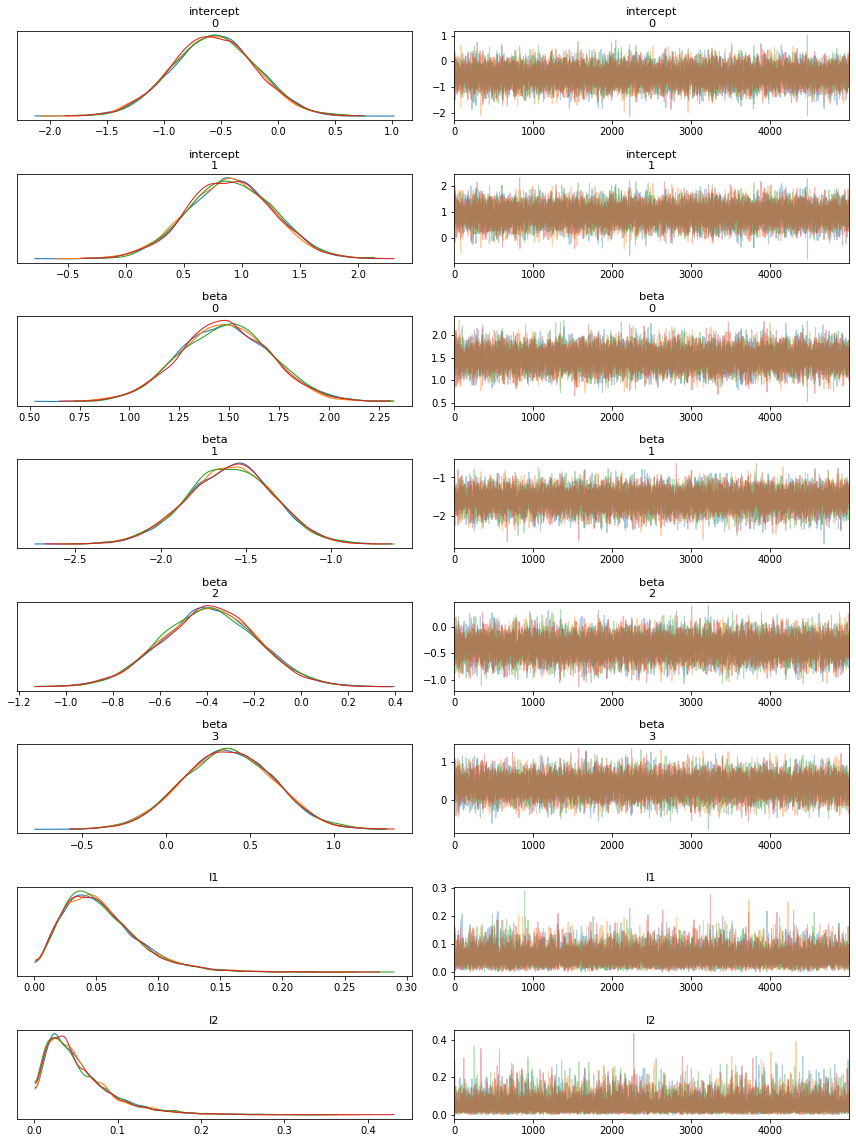

In [56]:
az.plot_trace(model_data, var_names=["intercept","beta","l1","l2"], compact=False)
plt.tight_layout()
#plt.savefig('ParamMod')
plt.show()


In [57]:
pred = model_fit.y_pred
m=0
for i in range(pred.shape[0]):
  if m < sum(pred[i] == Ydata+1):
    m = sum(pred[i] == Ydata+1)
    idx = i

In [58]:
print(m,idx)
print(m/(380-ntest))

194 3699
0.5388888888888889


### PREDIZIONE

In [59]:
pred = model_fit.y_pred
m=0
for i in range(pred.shape[0]):
  # Se m è più piccolo della somma di tutti i risultati azzaccati -> aggiornalo
  if m < sum(pred[i] == Ydata+1):
    m = sum(pred[i] == Ydata+1)
    idx = i
print(m,idx)

194 3699


In [60]:
# Retrieve last match played by each team to retrieve last skill
def last_skill(SR):
  last_match_home = {}
  M = X.head(X.shape[0]-ntest)
  for team in Teams:
      team_matches = M[(M['HomeTeam'] == team)].sort_index(ascending=False)
      last_match_home[team] = team_matches.index[0]

  last_match_away = {}
  for team in Teams:
      team_matches = M[(M['AwayTeam'] == team)].sort_index(ascending=False)
      last_match_away[team] = team_matches.index[0]

  init_home = np.empty(0)
  init_away = np.empty(0)

  for team in Teams:
    sh = "X["+str(last_match_home[team])+",1]"
    init_home = np.append(init_home,SR[sh])
    sa = "X["+str(last_match_home[team])+",2]"
    init_away = np.append(init_away,SR[sa])
  
  return init_home,init_away

In [61]:
def compute_skills(R,R2,init_home,init_away,l1=0.5, l2=0.5):
    """
    Takes as inputs a matrix X with teams and their result
    init is the inizialization of the skills, must be an array or list with the skill for each team.

    Returns two matrices with home and away skills parameters by team 
    and one matrix with skills parameters oredered cronologically
    """
    import numpy as np
    import pandas as pd

    N=R.shape[0] # number of matches
    

    #Creating matrices to store the skill parameters and their stories
        
    HS = pd.DataFrame(index = R2.index, columns = ["Home", "Away"])
  
    for i in range(R2.shape[0]):
        HS["Home"][i] = np.empty(0)
        HS["Away"][i] = np.empty(0)
        
    data = pd.DataFrame(index = R.index, columns=['Home','Away'])
    C = pd.DataFrame({"Home": np.zeros(len(R2.index), dtype = np.int8), "Away": np.zeros(len(R2.index), dtype = np.int8)})
    C.index = R2.index

    for i in range(R.shape[0]):
        h = R["Home"][i]
        a = R["Away"][i]

        #calcolo somma per xh
        sh = 0
        for j in range(C["Home"][h]):
            sh = sh + R2["Home"][h][j]*(1-l1)**j
        
        xh = l1*sh + init_home[h]*(1-l1)**C["Home"][h]

        #calcolo somma per xv
        sa = 0
        for j in range(C["Away"][a]):
            sa = sa + R2["Away"][a][j]*(1-l2)**j
        
        xv = l2*sa + init_away[a]*(1-l2)**C["Away"][a]
        
        #append nostra matrice storico e dati per stan
        HS["Home"][h] = np.append(HS["Home"][h],round(xh,3))
        HS["Away"][a] = np.append(HS["Away"][a],round(xv,3))
        data["Home"][i] = round(xh,3)
        data["Away"][i] = round(xv,3)
        
        #incremento counts
        C["Home"][h] += 1
        C["Away"][a] += 1

    return HS,data

In [62]:
def prediction(model, new_data, SR,):
  import math
  
  R, R2 = crea_matrici(new_data)
  
  init_home,init_away = last_skill(SR)

  HS, data = compute_skills(R, R2, init_home, init_away, l1 = SR["l1"], l2 = SR["l2"])

  prob1 = []
  prob2 = []
  prob0 = []

  for i in range(new_data.shape[0]):
    odds1 = np.exp((-SR["intercept1"]) + SR["beta[1]"]*data["Home"][i] + SR["beta[3]"]*data["Home"][i]*MTnew[i] + SR["beta[2]"]*data["Away"][i] + SR["beta[4]"]*data["Away"][i]*MTnew[i])
    odds2 = np.exp((-SR["intercept2"]) + SR["beta[1]"]*data["Home"][i] + SR["beta[3]"]*data["Home"][i]*MTnew[i] + SR["beta[2]"]*data["Away"][i] + SR["beta[4]"]*data["Away"][i]*MTnew[i])
    prob1 = np.append(prob1, odds1/(odds1 + 1) - odds2/(odds2 + 1)) # PAREGGIO
    prob2 = np.append(prob2, odds2/(odds2 + 1)) # VITTORIA
    prob0 = np.append(prob0, 1-prob1[i]-prob2[i]) # SCONFITTA
  print("fine prediction")
  
  return prob0,prob1,prob2


In [63]:
new_data = X.tail(ntest)
MTnew=XMT.tail(ntest).reset_index(drop=1)
SR = model_fit.summary()["Mean"]

DEBUG:cmdstanpy:cmd: /root/.cmdstan/cmdstan-2.31.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmptzzr1ejc/stansummary-ordinal_reg-4d2rr7zp.csv /tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_1.csv /tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_2.csv /tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_3.csv /tmp/tmptzzr1ejc/ordinal_regqc5h59e2/ordinal_reg-20230213073442_4.csv
cwd: None


In [64]:
print(SR["beta[1]"])
print(SR["beta[2]"])
print(SR["beta[3]"])
print(SR["beta[4]"])

1.47843
-1.59158
-0.390487
0.36693


In [65]:
prob0,prob1,prob2 = prediction(model_fit, new_data, SR)

df = pd.DataFrame({'Column1': prob0, 'Column2': prob1, 'Column3': prob2})

max_column = df.idxmax(axis=1)
index = max_column.map(df.columns.get_loc)
y_pred = index.tolist()


print("Ne azzecchiamo il ",sum(X["Y"].tail(ntest)==y_pred)/new_data.shape[0]*100,"%")

fine prediction
Ne azzecchiamo il  25.0 %


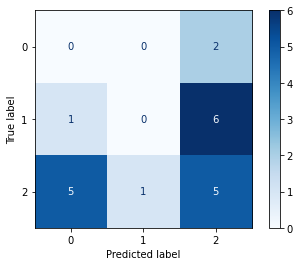

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.38      0.45      0.42        11

    accuracy                           0.25        20
   macro avg       0.13      0.15      0.14        20
weighted avg       0.21      0.25      0.23        20



In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm= confusion_matrix(X["Y"].tail(ntest), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print('Classification Report')
target_names = ["0","1","2"]
print(classification_report(X["Y"].tail(ntest), y_pred, target_names=target_names))

## **Terzo** **modello** 

Costruisco 4 nuovi coefficienti, ahS - ahP - avS - avP, 

Y=intercetta + B1 x ahS x (1-METEO) + B2 x ahP x METEO + B3 x avS x (1-METEO) + B4 x avP x METEO


Dove meteo è una variabile zero-uno dummy, 1 se piove zero altrimenti

### Matrici New


Devo ricalcolare tutte le funzioni con il calcolo delle matrici poichè ho il fattore meteo

In [67]:
def crea_matrici(X, meteo):
    """
    Takes as input a matrix X and their result to create two additional matrices that can be used for our model
    """
    #matrice casa trasferta risultato in numeri (N_match, 3)
    Y = np.array([3 if(X.iloc[i,3]=='H') else(0 if(X.iloc[i,3]=='A') else(1)) for i in range(X.shape[0])])
    
    Teams=list(X.iloc[:,1].unique())
    Teams=sorted(Teams)
    d = names_to_index(Teams)

    meteo=meteo.iloc[:,1]
    #meteo=np.array(meteo.d[meteo.iloc[i,1]] for i in range(X.shape[0])])
    T_1 = np.array([d[X.iloc[i,1]] for i in range(X.shape[0])])
    T_2 = np.array([d[X.iloc[i,2]] for i in range(X.shape[0])])
    R = pd.DataFrame({"Home":T_1,"Away":T_2,"Result":Y,"Meteo":meteo})
    
    #matrice di storie delle squadre, casa-trasferta (N_Teams, 2)
    dim_vec_home = R['Home'].value_counts()
    dim_vec_away = R['Away'].value_counts()
    
    R2 = pd.DataFrame(index = sorted(np.unique(T_1)), columns = ["HomeS", "AwayS","HomeP","AwayP"])
    

    for i in range(len(np.unique(T_1))):
      R2["HomeS"][i] = np.empty(0,dtype = np.int8)
      R2["AwayS"][i] = np.empty(0,dtype = np.int8)
      R2["HomeP"][i] = np.empty(0,dtype = np.int8)
      R2["AwayP"][i] = np.empty(0,dtype = np.int8)
          
    for i in range(len(T_1)):
      hS = R["Home"][i]
      aS = R["Away"][i]
      hP = R["Home"][i]
      aP = R["Away"][i]
      if(R["Meteo"][i]==1):
        R2["HomeP"][hP] = np.append(R2["HomeP"][hP],R["Result"][i])
        if(R["Result"][i]==1):
          R2["AwayP"][aP] = np.append(R2["AwayP"][aP], R["Result"][i])
        else:                                                       #Sconfitta 0 punti
          R2["AwayP"][aP] = np.append(R2["AwayP"][aP], 3 - R["Result"][i])
      else:
        R2["HomeS"][hS] = np.append(R2["HomeS"][hS],R["Result"][i])
        if(R["Result"][i]==1):
            R2["AwayS"][aP] = np.append(R2["AwayS"][aP], R["Result"][i])
        else:                                                       #Sconfitta 0 punti
          R2["AwayS"][aP] = np.append(R2["AwayS"][aP], 3 - R["Result"][i])
    kk=-1
    for i in range(R2.shape[0]):
      while(len(R2["HomeS"][i])<19):
        R2["HomeS"][i]=np.append(R2["HomeS"][i],kk)
      while(len(R2["HomeP"][i])<19):
        R2["HomeP"][i]=np.append(R2["HomeP"][i],kk)  
      while(len(R2["AwayS"][i])<19):
        R2["AwayS"][i]=np.append(R2["AwayS"][i],kk)
      while(len(R2["AwayP"][i])<19):
        R2["AwayP"][i]=np.append(R2["AwayP"][i],kk)
    return R,R2


In [68]:
def compute_skills(R,R2,init_homeS,init_awayS,init_homeP,init_awayP,l1,l2,l3,l4):
    """
    Takes as inputs a matrix X with teams and their result
    init is the inizialization of the skills, must be an array or list with the skill for each team.

    Returns two matrices with home and away skills parameters by team 
    and one matrix with skills parameters oredered cronologically
    """
    import numpy as np
    import pandas as pd

    N=R.shape[0] # number of matches
    CS=init_homeS.copy()
    FS=init_awayS.copy()
    CP=init_homeP.copy()
    FP=init_awayP.copy()
    HS = pd.DataFrame(index = R2.index, columns = ["HomeS","AwayS", "HomeP","AwayP"])

    for i in range(R2.shape[0]):
        
        HS["HomeS"][i] = np.empty(0)
        HS["HomeP"][i] = np.empty(0)
        HS["AwayS"][i] = np.empty(0)
        HS["AwayP"][i] = np.empty(0)
        #Creating matrices to store the skill parameters and their stories
            
    meteo=R.iloc[:,3]   
    data = pd.DataFrame(index = R.index, columns=["HomeS","AwayS", "HomeP","AwayP"])
    for i in range(R.shape[0]): #INIZALIZZO TUTTA LA MATRICE CON ZERI, FORSE ORA INUTILE
      for j in range(4):
        data.iloc[i,j]=0
    C = pd.DataFrame({"HomeS": np.zeros(len(R2.index), dtype = np.int8),"AwayS": np.zeros(len(R2.index), dtype = np.int8),"HomeP": np.zeros(len(R2.index), dtype = np.int8), "AwayP": np.zeros(len(R2.index), dtype = np.int8)})

    for i in range(R.shape[0]):
#
        hS = R["Home"][i] #E' L'indice del team Home
        aS = R["Away"][i] #E' L'indice del team Away
        #calcolo somma per xh
        if(meteo[i]==0):
          sh = 0
          for j in range(C["HomeS"][hS]):
              sh = sh + R2["HomeS"][hS][j]*(1-l1)**j #Questa è la sommatoria
          
          xh = l1*sh + init_homeS[hS]*(1-l1)**C["HomeS"][hS]
          
          #calcolo somma per xv
          sa = 0
          for j in range(C["AwayS"][aS]):
              sa = sa + R2["AwayS"][aS][j]*(1-l2)**j
          xv = l2*sa + init_awayS[aS]*(1-l2)**C["AwayS"][aS]

          #append nostra matrice storico e dati per stan
          HS["HomeS"][hS] = np.append(HS["HomeS"][hS],round(xh,3))
          HS["AwayS"][aS] = np.append(HS["AwayS"][aS],round(xv,3))

          CS[hS]=round(xh,3)
          FS[aS]=round(xv,3)

          data["HomeS"][i] = round(xh,3)
          data["AwayS"][i] = round(xv,3)
          data["HomeP"][i] = CP[hS]
          data["AwayP"][i] = FP[aS]
          #incremento counts
          C["HomeS"][hS] += 1
          C["AwayS"][aS] += 1
        if(meteo[i]==1):
          sh = 0
          for j in range(C["HomeP"][hS]):
              sh = sh + R2["HomeP"][hS][j]*(1-l3)**j #Questa è la sommatoria
          
          xh = l3*sh + init_homeP[hS]*(1-l3)**C["HomeP"][hS]
          
          #calcolo somma per xv
          sa = 0
          for j in range(C["AwayP"][aS]):
              sa = sa + R2["AwayP"][aS][j]*(1-l4)**j
          
          xv = l4*sa + init_awayP[aS]*(1-l4)**C["AwayP"][aS]

          #append nostra matrice storico e dati per stan
          HS["HomeP"][hS] = np.append(HS["HomeP"][hS],round(xh,3))
          HS["AwayP"][aS] = np.append(HS["AwayP"][aS],round(xv,3))
          CP[hS]=round(xh,3)
          FP[aS]=round(xv,3)
          data["HomeS"][i] = CS[hS]
          data["AwayS"][i] = FS[aS]
          data["HomeP"][i] = round(xh,3)
          data["AwayP"][i] = round(xv,3)
          
          
          #incremento counts
          C["HomeP"][hS] += 1
          C["AwayP"][aS] += 1


    return HS,data

### Modello

In [69]:
R17, R2_17=crea_matrici(X_old, XMet17)

In [70]:
R_old, R2_old = crea_matrici(X, XMet)


In [71]:

ordinal_reg = '''
data{
    int<lower=0> N; // Matches
    array[N] int y;
    int<lower=0> T; // Teams
    array[N,4] int R;  // Game+Result matrix
    array[T,4,19] int R2; // Teams' history
    vector[T] IHS;    // init_home_S
    vector[T] IAS;    // init_away_S
    vector[T] IHP;    // init_home_P
    vector[T] IAP;    // init_away_P
}

parameters { vector[4] beta; // coefficients for predictor variables, considering the dummy
            real intercept1;
            real<lower=intercept1+0.0001,upper=100000> intercept2;
            real<lower=0,upper=1> l1;
            real<lower=0,upper=1> l2;
            real<lower=0,upper=1> l3;
            real<lower=0,upper=1> l4;
}

transformed parameters {
  matrix[N,4] X;     // Skills
  real sh;
  real sa;
  vector[N] mu;
  vector[2] intercept;
  intercept[1] = intercept1;
  intercept[2] = intercept2;
 

  {
    array[T,4] int C=rep_array(0,T,4);
    for(i in 1:N){
      for(j in 1:4){
        X[i,j]=0;
      }
    }
  
    for(i in 1:N){

      int h = R[i,1]+1; // Home team index
      int a = R[i,2]+1; // Away team index

      if(R[i,4]==0){       //CONTROLLO CHE SIA SOLE    
          int ch = C[h,1]; // Home count SUN
          int ca = C[a,2]; //Away count SUN

          // Home team skill update
          if(ch==0){
            X[i,1] = IHS[h];
          }
          else{
            sh=0;
            for(j in 1:ch){   
              sh=sh+R2[h,1,j]*pow((1-l1),j-1);
              }     
            X[i,1]=l1*sh+IHS[h]*pow((1-l1),ch);


          }
          if(ca==0){
            X[i,2] = IAS[a];
          }
          else{
            sa=0;
            for(j in 1:ca){   
              sa=sa+R2[a,2,j]*pow((1-l2),j-1);
            }
            X[i,2]=l2*sa+IAS[a]*pow((1-l2),ca);
          }         

          C[h,1]=C[h,1]+1;
          C[a,2]=C[a,2]+1;        

      }
  // ORA GUARDO LE PARTITE CON PIOGGIA
      else{
          int ch = C[h,3]; // Home count P
          int ca = C[a,4]; //Away count  P

        // Home team skill update
        if(ch==0){
          X[i,3] = IHP[h];
        }
        else{
          sh=0;
          for(j in 1:ch){   
            sh=sh+R2[h,3,j]*pow((1-l3),j-1);
            }     
          X[i,3]=l3*sh+IHP[h]*pow((1-l3),ch);


        }
        if(ca==0){
          X[i,4] = IAP[a];
        }
        else{
          sa=0;
          for(j in 1:ca){   
            sa=sa+R2[a,4,j]*pow((1-l4),j-1);
          }
          X[i,4]=l4*sa+IAP[a]*pow((1-l4),ca);
        }
        C[h,3]=C[h,3]+1;
        C[a,4]=C[a,4]+1;
    
      }
    }
    for(i in 1:N){
    mu[i] = X[i,1]*beta[1]*(1-R[i,4])+X[i,2]*beta[2]*(1-R[i,4])+X[i,3]*beta[3]*R[i,4]+X[i,4]*beta[4]*R[i,4];
    }
  }
}

model { // calculate likelihood of ordinal categories given predictor variable values and coefficients 
       
       beta[1] ~ normal(1.1,2);
       beta[2] ~ normal(-1.4,2);
       beta[3] ~ normal(1,2);
       beta[4] ~ normal(-1.1,2);

       intercept1 ~ normal(-0.75,2);
       intercept2 ~ normal(0.75,2);

       l1 ~ beta(3,3);
       l2 ~ beta(3,3);
       l3 ~ beta(3,3);
       l4 ~ beta(3,3);

       for (i in 1:N) { 
         y[i] ~ ordered_logistic(mu[i],intercept); } 
       }

generated quantities{
  vector[N] y_pred; 
  for(i in 1:N){
    y_pred[i] = ordered_logistic_rng(mu[i],intercept);
  }
}
'''

stan_file = "./ordinal_reg.stan"

with open(stan_file, "w") as f:
    print(ordinal_reg, file=f)

ordinal_reg = CmdStanModel(stan_file=stan_file)

DEBUG:cmdstanpy:Removing /content/ordinal_reg
07:44:57 - cmdstanpy - INFO - compiling stan file /content/ordinal_reg.stan to exe file /content/ordinal_reg
INFO:cmdstanpy:compiling stan file /content/ordinal_reg.stan to exe file /content/ordinal_reg
DEBUG:cmdstanpy:cmd: make /content/ordinal_reg
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/ordinal_reg.hpp /content/ordinal_reg.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content

In [72]:
ntest=60
Ydata = Y[:X.shape[0]-ntest]
Rd = R_old.head(X.shape[0]-ntest)
MT=Rd.iloc[:,3]


In [73]:
model_data = {'N': len(Ydata), 'y': Ydata+1, 'T': len(Teams), 'R': Rd, 'R2': R2_old.values.tolist(), 'IHS': init_home, 'IAS': init_away, "IHP": init_home, "IAP": init_away}

model_fit=ordinal_reg.sample(data=model_data, chains=4,
                           parallel_chains=4, iter_warmup=1000,
                           iter_sampling=5000)
model_data=az.from_cmdstanpy(model_fit)


DEBUG:cmdstanpy:input tempfile: /tmp/tmptzzr1ejc/bu3h1m5e.json
DEBUG:cmdstanpy:cmd: /content/ordinal_reg info
cwd: None
07:45:21 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=1', 'random', 'seed=46419', 'data', 'file=/tmp/tmptzzr1ejc/bu3h1m5e.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=2', 'random', 'seed=46419', 'data', 'file=/tmp/tmptzzr1ejc/bu3h1m5e.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/ordinal_reg', 'id=3', 'random', 'seed=46419', 'data', 'file=/tmp/tmptzzr1ejc/bu3h1m5e.json', 'output', 'file=/tmp/t

07:50:26 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/ordinal_reg', 'id=1', 'random', 'seed=46419', 'data', 'file=/tmp/tmptzzr1ejc/bu3h1m5e.json', 'output', 'file=/tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_1.csv
 console_msgs (if any):
	/tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      

In [74]:
cmdstanpy_data = az.from_cmdstanpy(model_fit)
np.sum(cmdstanpy_data.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

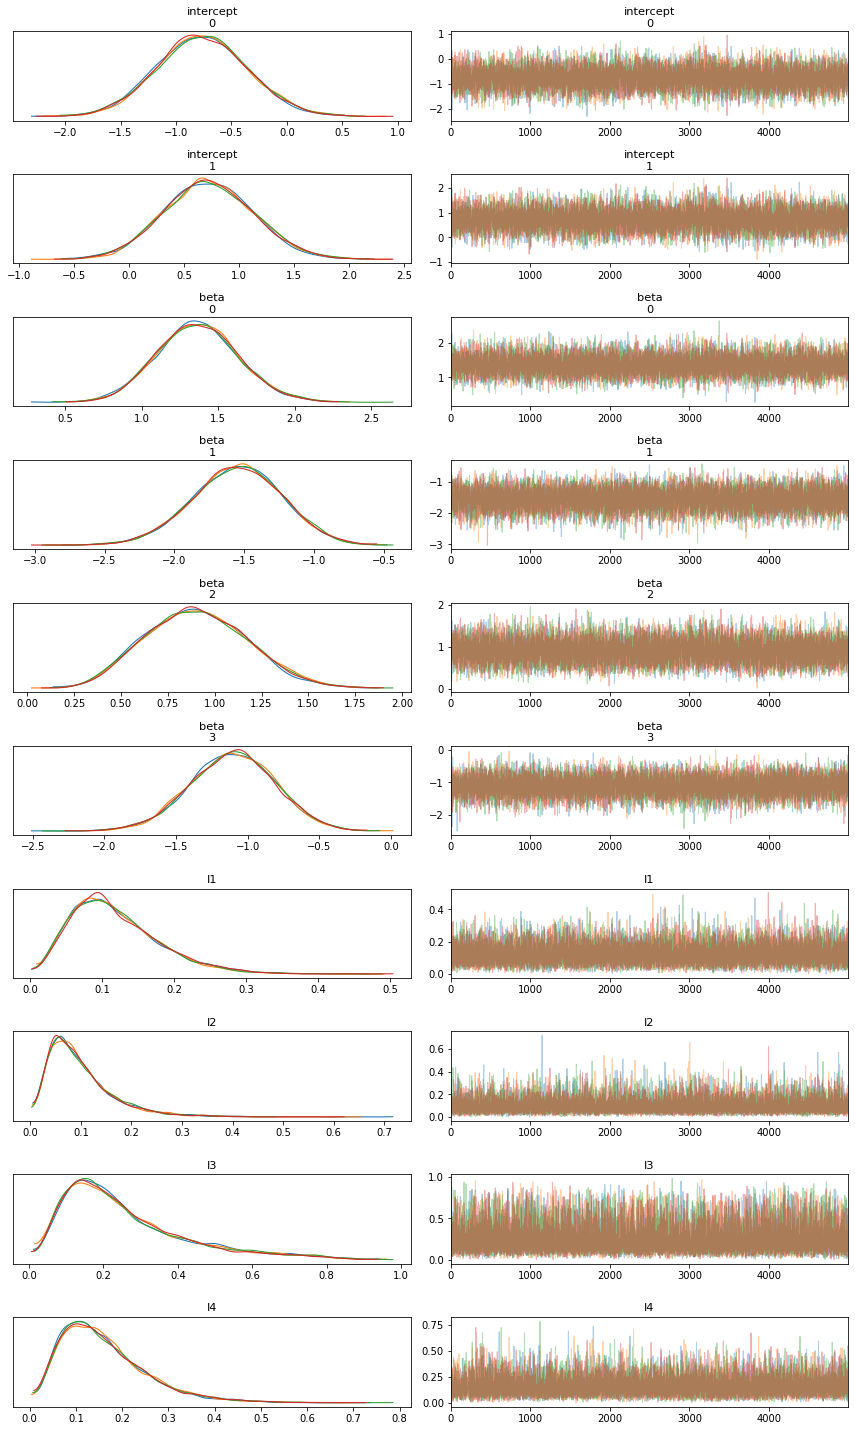

In [76]:
az.plot_trace(model_data, var_names=["intercept","beta","l1","l2","l3","l4"], compact=False)
plt.tight_layout()
#plt.savefig('ParamMod')
plt.show()


### PREDIZIONE

In [77]:
pred = model_fit.y_pred
m=0
for i in range(pred.shape[0]):
  # Se m è più piccolo della somma di tutti i risultati azzaccati -> aggiornalo
  if m < sum(pred[i] == Ydata+1):
    m = sum(pred[i] == Ydata+1)
    idx = i
print(m,idx)

177 7780


In [78]:
# Retrieve last match played by each team to retrieve last skill
def last_skill(SR):
  last_match_home = {}

  M = X.head(X.shape[0]-ntest)
  for team in Teams:
      team_matches = M[(M['HomeTeam'] == team )].sort_index(ascending=False)
      last_match_home[team] = team_matches.index[0]
  last_match_away = {}
  for team in Teams:
      team_matches = M[(M['AwayTeam'] == team)].sort_index(ascending=False)
      last_match_away[team] = team_matches.index[0]

  init_homeS = np.empty(0)
  init_awayS = np.empty(0)
  init_homeP = np.empty(0)
  init_awayP = np.empty(0)
  for team in Teams:

    sh = "X["+str(last_match_home[team])+",1]"
    init_homeS = np.append(init_homeS,SR[sh])
    sh = "X["+str(last_match_home[team])+",3]"
    init_homeP = np.append(init_homeP,SR[sh])
    sa = "X["+str(last_match_home[team])+",2]"
    init_awayS = np.append(init_awayS,SR[sa])
    sa = "X["+str(last_match_home[team])+",4]"
    init_awayP = np.append(init_awayP,SR[sa])
  print(init_homeS,init_homeP,init_awayS,init_awayP) 
  return init_homeS,init_homeP,init_awayS,init_awayP

In [79]:
def prediction(model, new_data, SR):

  R, R2 = crea_matrici(new_data, MTnew)

  #init_homeS,init_homeP,init_awayS,init_awayP = last_skill(SR) ##FORSE NON HO PIU' BISOGNO DI QUESTO

  HS, data = compute_skills(R, R2, init_home, init_away, init_home, init_away, l1 = SR["l1"], l2 = SR["l2"], l3 = SR["l3"], l4 = SR["l4"])

  prob1 = []
  prob2 = []
  prob0 = []
 
  for i in range(new_data.shape[0]):
                                      # X[i,1]*beta[1]*(1-R[i,4])                           + X[i,2]*beta[2]*(1-R[i,4])                          + X[i,3]*beta[3]*R[i,4]                          + X[i,4]*beta[4]*R[i,4];
    odds1 = np.exp((-SR["intercept1"]) + SR["beta[1]"]*data["HomeS"][i]*(1-MTnew.iloc[i,1]) + SR["beta[2]"]*data["AwayS"][i]*(1-MTnew.iloc[i,1]) + SR["beta[3]"]*data["HomeP"][i]*MTnew.iloc[i,1] + SR["beta[4]"]*data["AwayP"][i]*MTnew.iloc[i,1])
    odds2 = np.exp((-SR["intercept2"]) + SR["beta[1]"]*data["HomeS"][i]*(1-MTnew.iloc[i,1]) + SR["beta[2]"]*data["AwayS"][i]*(1-MTnew.iloc[i,1]) + SR["beta[3]"]*data["HomeP"][i]*MTnew.iloc[i,1] + SR["beta[4]"]*data["AwayP"][i]*MTnew.iloc[i,1])
    prob1 = np.append(prob1, odds1/(odds1 + 1) - odds2/(odds2 + 1)) # PAREGGIO
    prob2 = np.append(prob2, odds2/(odds2 + 1)) # VITTORIA
    prob0 = np.append(prob0, 1-prob1[i]-prob2[i]) # SCONFITTA
  print("fine prediction")
  
  return prob0,prob1,prob2


In [80]:
new_data = X
MTnew=XMet
SR = model_fit.summary()["Mean"]

DEBUG:cmdstanpy:cmd: /root/.cmdstan/cmdstan-2.31.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmptzzr1ejc/stansummary-ordinal_reg-8c2rcnmi.csv /tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_1.csv /tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_2.csv /tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_3.csv /tmp/tmptzzr1ejc/ordinal_regrh7_eyz7/ordinal_reg-20230213074521_4.csv
cwd: None


In [81]:
prob0,prob1,prob2 = prediction(model_fit, new_data, SR)

df = pd.DataFrame({'Column1': prob0, 'Column2': prob1, 'Column3': prob2})
df=df.tail(ntest)
max_column = df.idxmax(axis=1)
index = max_column.map(df.columns.get_loc)
y_pred = index.tolist()


print("Ne azzecchiamo il ",sum(X["Y"].tail(ntest)==y_pred)/ntest*100,"%")

fine prediction
Ne azzecchiamo il  35.0 %


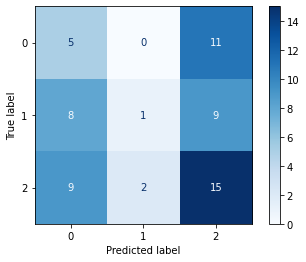

Classification Report
              precision    recall  f1-score   support

           0       0.23      0.31      0.26        16
           1       0.33      0.06      0.10        18
           2       0.43      0.58      0.49        26

    accuracy                           0.35        60
   macro avg       0.33      0.31      0.28        60
weighted avg       0.35      0.35      0.31        60



In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm= confusion_matrix(X["Y"].tail(ntest), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print('Classification Report')
target_names = ["0","1","2"]
print(classification_report(X["Y"].tail(ntest), y_pred, target_names=target_names))